In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nimfa
import umap

/Users/tessa/miniforge3/envs/nimfa/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/tessa/miniforge3/envs/nimfa/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/tessa/miniforge3/envs/nimfa/lib/python3.11/site-packages/umap/d

In [2]:
df = pd.read_csv("cleaned_data_SYMPTOMS_8_24_23.csv", index_col=0)
df.fillna(0, inplace=True)

In [25]:
bmf = nimfa.Bmf(df.T.values, seed="nndsvd", rank=10, max_iter=12, lambda_w=1.1, lambda_h=1.1)


In [26]:
bmf_fit = bmf()


In [27]:
vars(bmf_fit)

{'fit': bmf,
 'algorithm': 'bmf',
 'n_iter': 12,
 'n_run': 1,
 'seeding': 'nndsvd',
 'options': {}}

In [29]:
x = bmf_fit.basis()

In [84]:
bmf_fit.basis()

matrix([[3.21970835, 2.37344318, 1.73793708, ..., 2.62631993, 2.51831709,
         2.68965366],
        [2.26224325, 2.32489535, 0.42598566, ..., 1.86642052, 1.66879791,
         1.66863893],
        [0.0983341 , 1.18338762, 0.03229784, ..., 0.43682615, 0.38759383,
         0.35134441],
        ...,
        [3.559243  , 2.10944633, 3.06931967, ..., 3.09225315, 3.03185482,
         3.13659933],
        [4.13141592, 2.2180651 , 3.32767731, ..., 3.29661828, 3.18382685,
         3.28413593],
        [0.08386456, 1.31970136, 1.06597959, ..., 0.90724357, 0.62193484,
         0.75962483]])

In [35]:
z = bmf.factorize()

In [41]:
z.basis()

matrix([[3.21970835, 2.37344318, 1.73793708, ..., 2.62631993, 2.51831709,
         2.68965366],
        [2.26224325, 2.32489535, 0.42598566, ..., 1.86642052, 1.66879791,
         1.66863893],
        [0.0983341 , 1.18338762, 0.03229784, ..., 0.43682615, 0.38759383,
         0.35134441],
        ...,
        [3.559243  , 2.10944633, 3.06931967, ..., 3.09225315, 3.03185482,
         3.13659933],
        [4.13141592, 2.2180651 , 3.32767731, ..., 3.29661828, 3.18382685,
         3.28413593],
        [0.08386456, 1.31970136, 1.06597959, ..., 0.90724357, 0.62193484,
         0.75962483]])

In [60]:
proj = np.array(np.matmul(x.T, df.T.values))

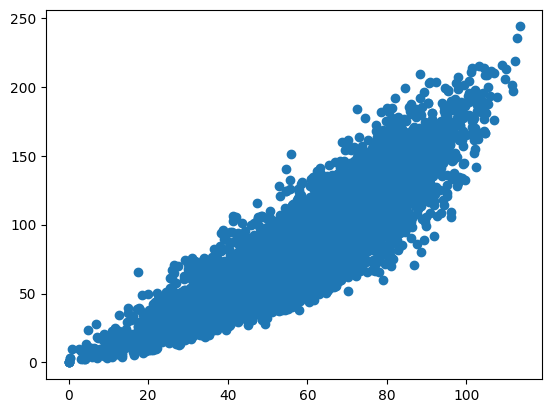

In [61]:
plt.scatter(proj[0, :], proj[1, :])

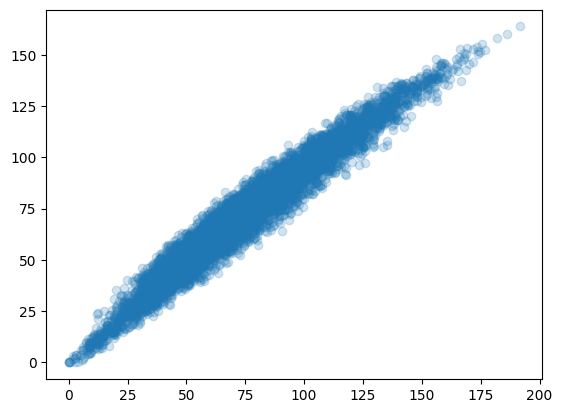

In [78]:
plt.scatter(proj[2, :], proj[3, :], alpha = 0.2)

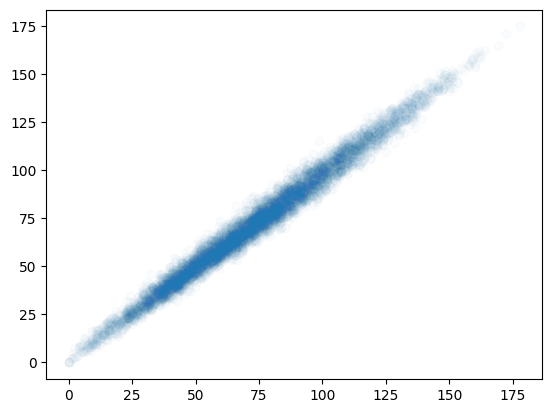

In [74]:
plt.scatter(proj[6, :], proj[5, :], alpha=0.02)

(array([1., 0., 0., 0., 0., 3., 3., 2., 0., 1.]),
 array([59.76636224, 63.23246533, 66.69856842, 70.1646715 , 73.63077459,
        77.09687768, 80.56298077, 84.02908385, 87.49518694, 90.96129003,
        94.42739312]),
 <BarContainer object of 10 artists>)

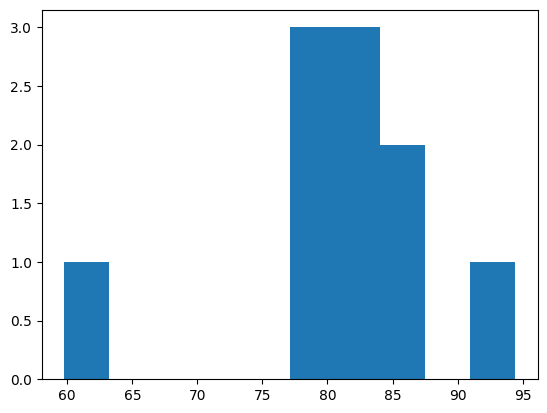

In [71]:
plt.hist(proj[:,6])

In [82]:
# UMAP the NIMFA to look at it? 
# Initialize UMAP with desired parameters
n_components = 2  # Number of dimensions for visualization
umap_model = umap.UMAP(n_components=n_components)

# Apply UMAP to the data
embedding = umap_model.fit_transform(proj.T)

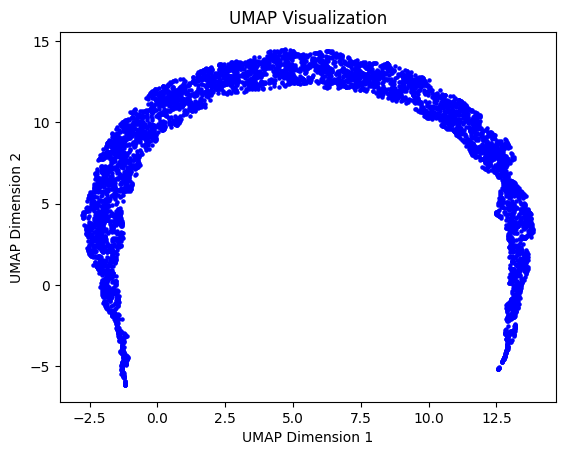

In [83]:
plt.scatter(embedding[:, 0], embedding[:, 1], c='blue', s=5)  # Adjust colors and size as needed
plt.title("UMAP Visualization")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()

In [87]:
bmf_fit.basis()

matrix([[3.21970835, 2.37344318, 1.73793708, ..., 2.62631993, 2.51831709,
         2.68965366],
        [2.26224325, 2.32489535, 0.42598566, ..., 1.86642052, 1.66879791,
         1.66863893],
        [0.0983341 , 1.18338762, 0.03229784, ..., 0.43682615, 0.38759383,
         0.35134441],
        ...,
        [3.559243  , 2.10944633, 3.06931967, ..., 3.09225315, 3.03185482,
         3.13659933],
        [4.13141592, 2.2180651 , 3.32767731, ..., 3.29661828, 3.18382685,
         3.28413593],
        [0.08386456, 1.31970136, 1.06597959, ..., 0.90724357, 0.62193484,
         0.75962483]])